In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm



CPU times: user 7.93 s, sys: 760 ms, total: 8.69 s
Wall time: 9.1 s


In [3]:
regions = regions_dict['ncra_regions']
watermark=""
issued_date=""

CPU times: user 33.8 s, sys: 1 s, total: 34.8 s
Wall time: 36.2 s


(<Figure size 600x600 with 6 Axes>,
 array([[<GeoAxes: >, <GeoAxes: >],
        [<GeoAxes: >, <GeoAxes: >]], dtype=object))

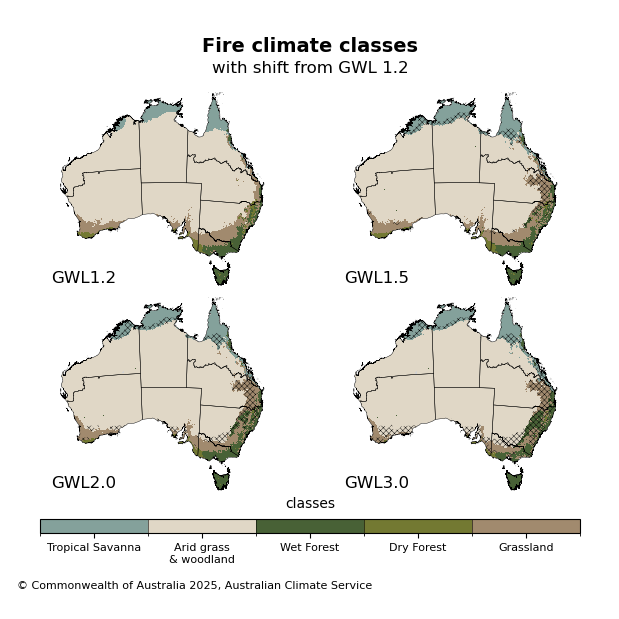

In [4]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                        stippling_gwl15 = stippling_gwl15,
                        stippling_gwl20 = stippling_gwl20,
                        stippling_gwl30 = stippling_gwl30,
                        title = "Fire climate classes",
                        cmap = cmap_dict["fire_climate"],
                        ticks = tick_dict["fire_climate_ticks"],
                        tick_labels = ["Tropical Savanna","Arid grass\n& woodland","Wet Forest","Dry Forest","Grassland",],
                        cbar_label = "classes",
                        watermark="",
                        date_range="with shift from GWL 1.2",
                       orientation="square",
                    cbar_location="bottom",
                    issued_date="",
                    tick_rotation=0,
                    figsize=(6, 6),
                    outfile=f"figures/holistic-australian-bushfire-risk-assessment/{var}_gwl12-15-20-30.png"
                        )

In [5]:
forest_area = xr.open_dataset("/g/data/ai05/ae2105/climate_classifications/fire_classes/fire_climate_classes_AGCDv1_1991-2020.nc")
forest_area


<xarray.Dataset> Size: 5MB
Dimensions:                      (lat: 691, lon: 886, class: 5)
Coordinates:
  * lat                          (lat) float32 3kB -44.5 -44.45 ... -10.05 -10.0
  * lon                          (lon) float32 4kB 112.0 112.1 ... 156.2 156.2
  * class                        (class) int64 40B 0 1 2 3 4
Data variables:
    fire_climate_class           (lat, lon) float64 5MB ...
    class_code                   (class) int64 40B ...
    class_long_description       (class) <U23 460B ...
    stern_dehoedt_minor_classes  (class) <U50 1kB ...
    colour_map                   (class) <U7 140B ...
Attributes:
    data_source:              AGCDv1 (zv2)
    temperature_data_tmax:    /g/data/zv2/agcd/v1-0-1/tmax/mean/r005/01month/...
    temperature_data_tmin:    /g/data/zv2/agcd/v1-0-1/tmin/mean/r005/01month/...
    precipitation_data_file:  /g/data/zv2/agcd/v1-0-1/precip/total/r005/01mon...
    notebook:                 stern_dehoedt_ernst_2000_AGCD.ipynb
    climatology_period:       1991 - 2020
    reference:                Stern, H., De Hoedt, G., & Ernst, J. (2000). Ob...

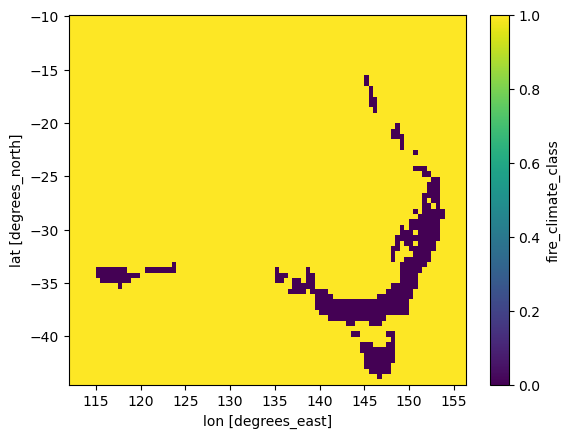

In [6]:
shading = (((forest_area["fire_climate_class"]==102) + (forest_area["fire_climate_class"]==103)).coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()<0.1)
shading.plot()

CPU times: user 2.11 s, sys: 19.7 ms, total: 2.13 s
Wall time: 2.13 s


(<Figure size 500x450 with 3 Axes>, <GeoAxes: >)

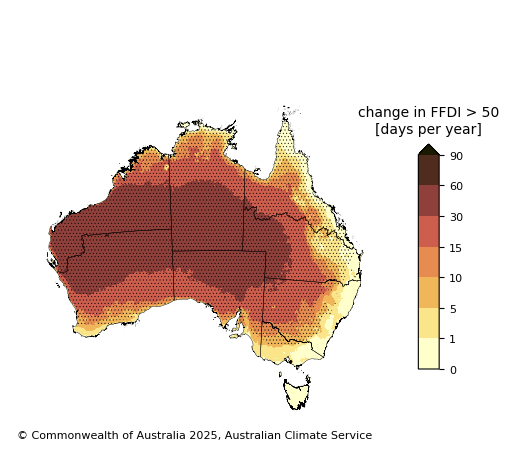

In [7]:
%%time 

# Changes in days of severe fire danger maps

var = "days50"

ffdi_ge50_mmm = xr.open_dataset(f"/g/data/ia39/ncra/fire/change_threshold_50.nc")

ds_gwl30 = ffdi_ge50_mmm.sel(period=3).drop_vars(["period"])


ticks_future=[0, 1, 5, 10, 15, 30, 60, 90,]
cmap_future=cmap_dict["ipcc_temp_seq"]
label_future=f"change in FFDI > 50\n[days per year]"


ds_gwl = ds_gwl30
plot_acs_hazard_1pp(data=ds_gwl[var],
                    title="",
                    regions = regions,
                    cmap = cmap_future,
                    cbar_extend= "max",
                    ticks = ticks_future,
                    shading=shading,
                    cbar_label = label_future,
                    watermark=watermark,
                    issued_date=issued_date,
                    outfile=f"figures/holistic-australian-bushfire-risk-assessment/FFDI{var}_gwl30.png"
                    )




CPU times: user 1.86 s, sys: 28.9 ms, total: 1.89 s
Wall time: 1.89 s


(<Figure size 500x450 with 3 Axes>, <GeoAxes: >)

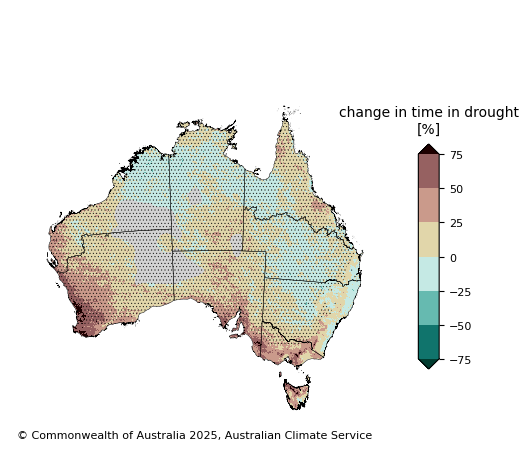

In [8]:
%%time
# Time spent in drought maps 

var="SPI3"

ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi/downscaled_BC_5km/QME-AGCDv1/SPI3_pct_time_below_-1_MME_change_GWL3.0_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc").sel(quantile = 0.5)


ticks_future=np.arange(-75, 76, 25)
cmap_future=cmap_dict["aridity_anom_r"]
label_future=f"change in time in drought\n[%]"



ds_gwl = ds_gwl30
plot_acs_hazard_1pp(data=ds_gwl[var],
                    title="",
                    regions = regions,
                    agcd_mask=True,
                    shading=shading,
                    cmap = cmap_future,
                    ticks = ticks_future,
                    cbar_label = label_future,
                    watermark=watermark,
                    issued_date=issued_date,
                    outfile=f"figures/holistic-australian-bushfire-risk-assessment/{var}_gwl30.png"
                    )

CPU times: user 1.84 s, sys: 14.1 ms, total: 1.85 s
Wall time: 1.85 s


(<Figure size 500x450 with 3 Axes>, <GeoAxes: >)

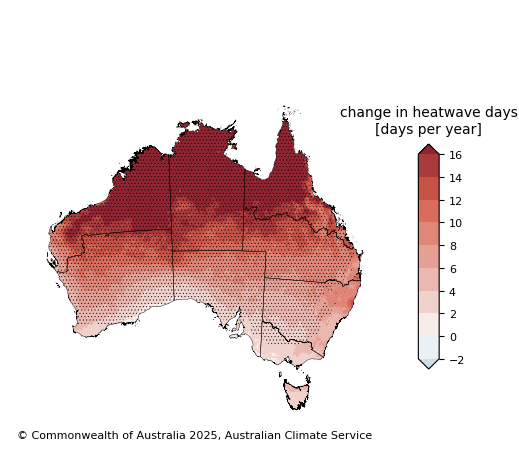

In [9]:
%%time 

# Severe or extreme heatwave days map 
var = "HW_sev_ext"

ds_gwl = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

ticks_future=np.arange(-2,18,2)
cmap_future=cmap_dict["ipcc_temp_div"]
label_future=f"change in heatwave days\n[days per year]"


plot_acs_hazard_1pp(data=ds_gwl[var],
                    title="",
                    regions = regions,
                    shading=shading,
                    cmap = cmap_future,
                    ticks = ticks_future,
                    cbar_label = label_future,
                    watermark=watermark,
                    issued_date=issued_date,
                    vcentre=0,
                    outfile=f"figures/holistic-australian-bushfire-risk-assessment/{var}_gwl30.png"
                    )


CPU times: user 2.12 s, sys: 30 ms, total: 2.15 s
Wall time: 2.15 s


(<Figure size 500x450 with 3 Axes>, <GeoAxes: >)

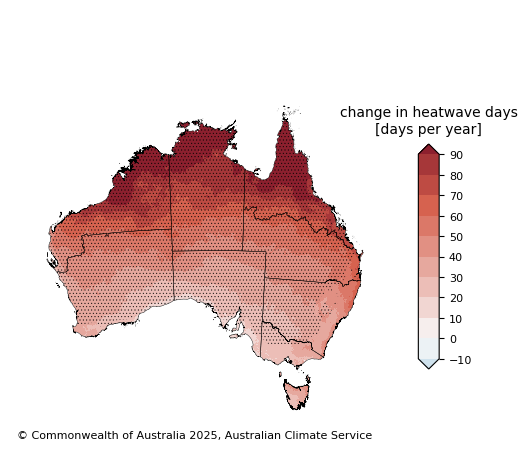

In [10]:
%%time 

# Severe or extreme heatwave days map 
var = "HWF"

ds_gwl = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

ticks_future=np.arange(-10,100,10)
cmap_future=cmap_dict["ipcc_temp_div"]
label_future=f"change in heatwave days\n[days per year]"


plot_acs_hazard_1pp(data=ds_gwl[var],
                    title="",
                    regions = regions,
                    shading=shading,
                    cmap = cmap_future,
                    ticks = ticks_future,
                    cbar_label = label_future,
                    watermark=watermark,
                    issued_date=issued_date,
                    vcentre=0,
                    outfile=f"figures/holistic-australian-bushfire-risk-assessment/{var}_gwl30.png"
                    )


CPU times: user 1.75 s, sys: 15.9 ms, total: 1.77 s
Wall time: 1.77 s


(<Figure size 500x450 with 3 Axes>, <GeoAxes: >)

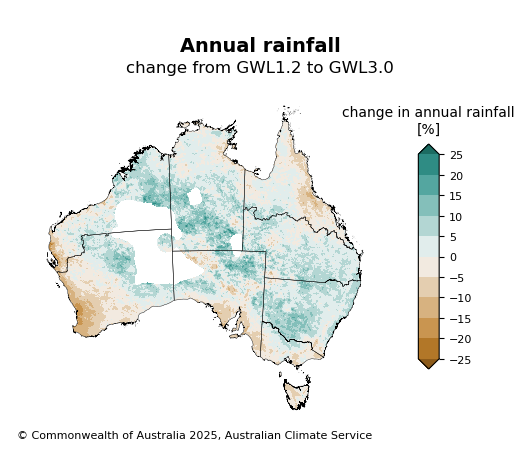

In [11]:
%%time
var = "prAdjust"

# ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12_annual.nc")
# ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15_change_annual.nc")
# ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20_change_annual.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change_annual.nc")

plot_acs_hazard_1pp(data=ds_gwl30[var],
                        regions = regions,
                        title = "Annual rainfall",
                        date_range="change from GWL1.2 to GWL3.0",
                        cmap = cmap_dict['ipcc_prec_div'],
                        ticks = np.arange(-25, 26, 5),
                        cbar_label = "change in annual rainfall [%]",
                        cbar_extend="both",
                        watermark="",
                       agcd_mask=True,
                        # subplot_titles=["+3.0\N{DEGREE SIGN}C\nwarming"],
                        issued_date="",
                      tick_rotation=0,
                      vcentre=0,
                      )

CPU times: user 1.71 s, sys: 11.7 ms, total: 1.72 s
Wall time: 1.72 s


(<Figure size 500x450 with 3 Axes>, <GeoAxes: >)

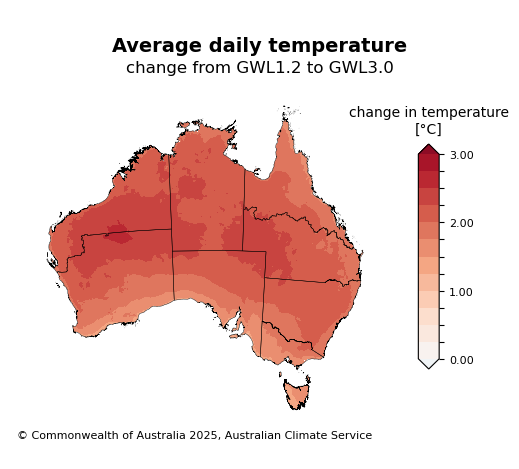

In [12]:
%%time 

var = "TGm"

ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc")

plot_acs_hazard_1pp(data=ds_gwl30[var],
                        regions = regions,
                        title = "Average daily temperature",
                        date_range="change from GWL1.2 to GWL3.0",
                        cmap = cmap_dict["tas_anom"],
                        ticks = np.arange(0, 3.1, 0.25),
                        cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                        watermark="",
                      issued_date="",
                       vcentre=0,
                       tick_rotation=0,
                       tick_interval=4,
                       )